In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits

In [10]:
all_data = load_digits()
all_data.data.shape

(1797, 64)

In [11]:
dir(all_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
all_data.data[50]

array([ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
       14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
        0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
        0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
       11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.])

In [17]:
all_data.images[50]

array([[ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  8., 14.,  4.,  0.],
       [ 0.,  0.,  6.,  2.,  3., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  1., 11.,  9.,  0.,  0.,  0.],
       [ 0.,  8., 16., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 14., 16., 11.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 12., 13.,  3.,  0.]])

In [20]:
all_data.target[50]

2

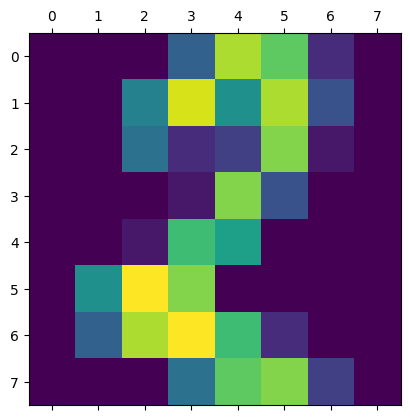

In [19]:
plt.matshow(all_data.images[50])

0
1
2
3
4


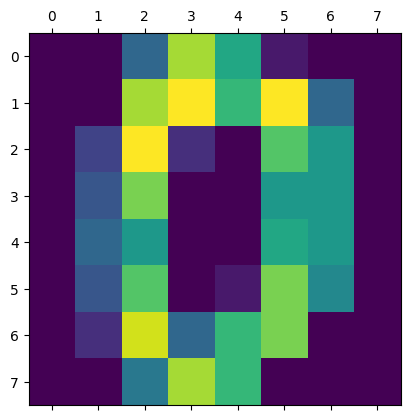

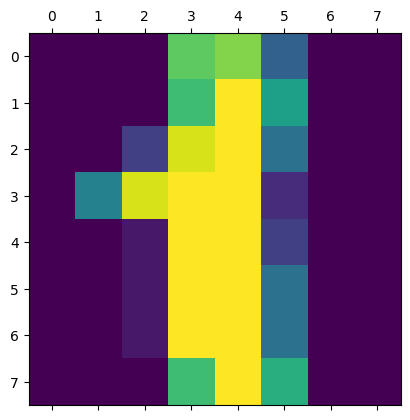

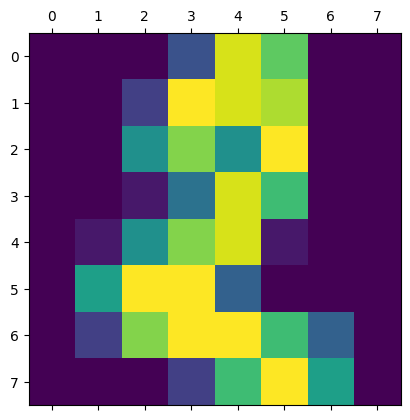

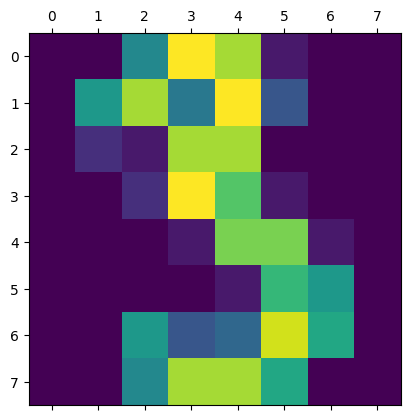

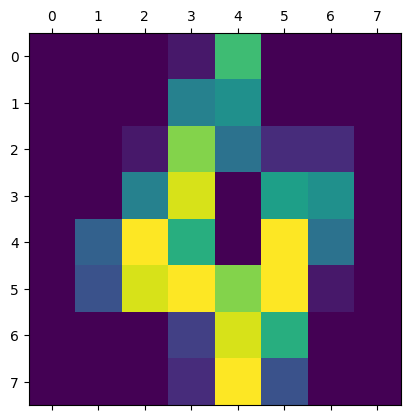

In [23]:
for x in range(5):
    print(all_data.target[x])
    plt.matshow(all_data.images[x])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_data.data, all_data.target, test_size=0.14)

In [26]:
X_train.shape

(1545, 64)

In [28]:
len(X_test)

252

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.score(X_test, y_test)

0.9642857142857143

In [33]:
all_data.data[60]

array([ 0.,  0., 10., 15., 14.,  4.,  0.,  0.,  0.,  0.,  4.,  6., 13.,
       16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,
        0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,
        0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  1.,  9.,  5.,
        6., 16.,  7.,  0.,  0.,  0., 14., 12., 15., 11.,  2.,  0.])

In [34]:
all_data.target[60]

3

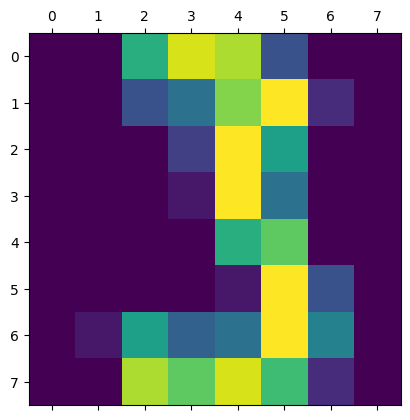

In [35]:
plt.matshow(all_data.images[60])

In [36]:
model.predict([all_data.data[60]])

array([3])

In [38]:
model.predict(all_data.data[50:55])

array([2, 2, 7, 8, 2])

In [39]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_predicted)
conf

array([[26,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 17,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 20,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

Text(58.222222222222214, 0.5, 'True values')

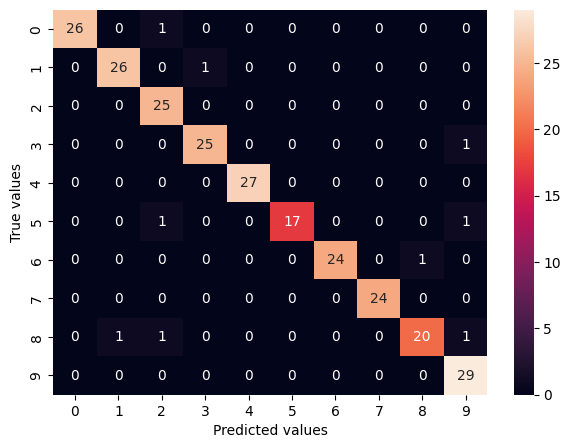

In [45]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(conf, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [46]:
import pickle
with open('digits_model', 'wb') as f:
    pickle.dump(model, f)